# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: 

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [2]:
# TODO: Import dataset and inspect the first five columns

df = pd.read_csv('seeds_dataset.txt', delimiter='\t', header = None)

df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [3]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y

print("Original shape of dataset: ", df.shape)
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Original shape of dataset:  (210, 8)
Shape of X: (210, 7)
Shape of y: (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

#### Answer

I picked the StandardScaler because it brings all of the variables onto a standard scale. This allows variables to be evaluated on a more equal scale.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [4]:
# TODO: Split the data into training and testing sets

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# TODO: Print the shape of the training feature matrix and target vector

print(X_train.shape)
print(X_test.shape)

(168, 7)
(42, 7)


Now that we have our training data, we can implement our selected scaler.

In [6]:
# TODO: Scale the data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [7]:
# TODO: Instantiate model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [9]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score

grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train_pca, y_train)

# Print the best parameters and best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on the test set
test_score = grid_search.score(X_test_pca, y_test)
print("Test Score:", test_score)

Best Parameters: {'C': 1.0, 'fit_intercept': True}
Best Cross-Validation Score: 0.9342245989304814
Test Score: 0.8809523809523809


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [10]:
# TODO: Predict y labels using best estimator

In [11]:
# TODO: Reduce dimensions of test data for plotting

In [12]:
# TODO: Plot test points colored by predicted label

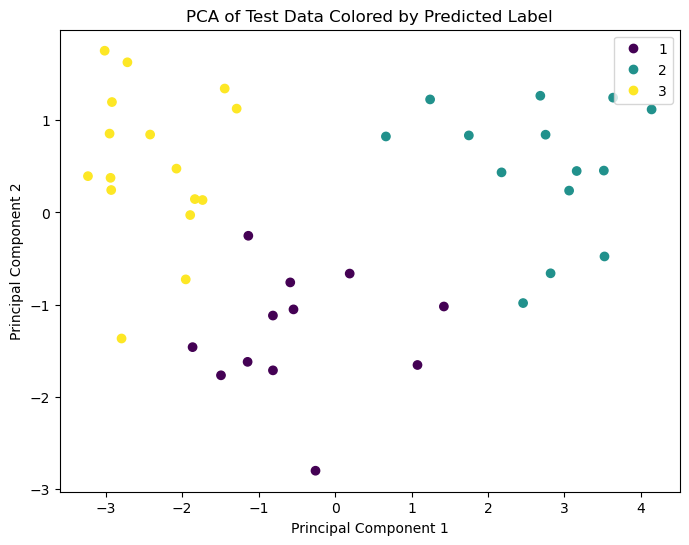

In [13]:
import matplotlib.pyplot as plt

y_pred = grid_search.best_estimator_.predict(X_test_pca)

# Plotting
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis')
plt.title('PCA of Test Data Colored by Predicted Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=set(y_pred))
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

#### Answers

1. Yes, the calculated values demonstrate the model worked well. The scores for both the training and testing data were high and within proximity of one another. This indicates there was a low bias and low variance present.
1. Yes it seems to have worked well. The predicted labels are grouped well, together. Both, PCA and logistic regression are both linear. Since both PCA and logistic regression worked well on the data given, we can assume that the dataset is linear.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

#### Answers

1. My code was sourced from the Clustering examples that we went over in class along with the previous assignments for ENSF 611. The previous assignments were used to reference how to seting up the same steps that we do every time we do machine learning.

2. The steps were completed in the order they were presented in the assignment itself. Unless the pre-processing is complete the rest of the steps cannot be completed. For parts that I got stuck on I referenced our notes until I was able to work through all of the problems sequentially. Since machine learning is the same five steps always, it is easier to use the same methodology and go from step one to five in order.

3. The use of GenerativeAI was for debugging when I was getting issues with settings up my code. The code was not used, it was more so used for checking that I had inputted everything correctly and I was not missing something causing issues.

4. No, I think there were not any significant challenges in Part A of the assignment. However, since it was one of the first times we have done unsupervised learning it was a bit different to set up parts of the code and not having a past assignment exactly like it to reference. However, following the in class examples and trying to take each step one at a time helped me for this assignment. 

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [14]:
# TODO: Scale feature matrix

X = df.iloc[:, :-1]  
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

/Users/yajurvashisht/opt/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yajurvashisht/opt/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yajurvashisht/opt/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yajurvashisht/opt/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

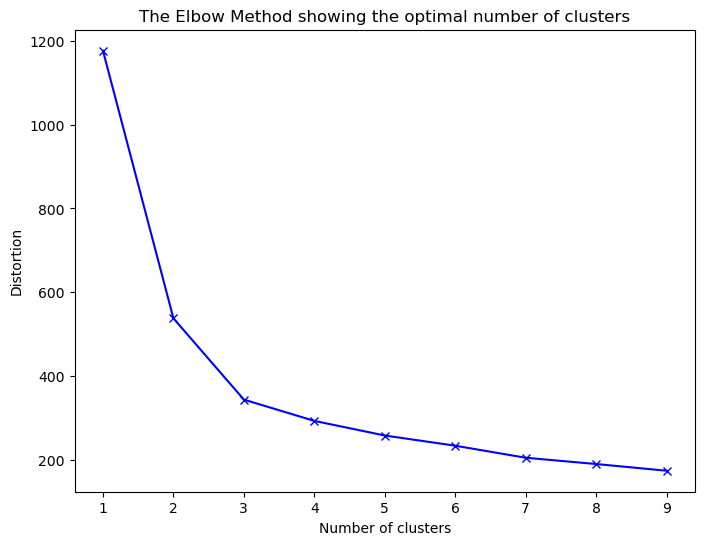

In [15]:
# TODO: Use the elbow method to determine the optimal number of clusters

from sklearn.cluster import KMeans

distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [16]:
# TODO: Implement K-means with the number of clusters determined in the previous step

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_scaled)
labels = kmeans.labels_

/Users/yajurvashisht/opt/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
# TODO: Calculate the three different validation metrics

silhouette = silhouette_score(X_train_scaled, labels)
calinski_harabasz = calinski_harabasz_score(X_train_scaled, labels)
davies_bouldin = davies_bouldin_score(X_train_scaled, labels)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)

Silhouette Score: 0.4590247768937097
Calinski-Harabasz Score: 196.91954950768792
Davies-Bouldin Score: 0.8046418212164979


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

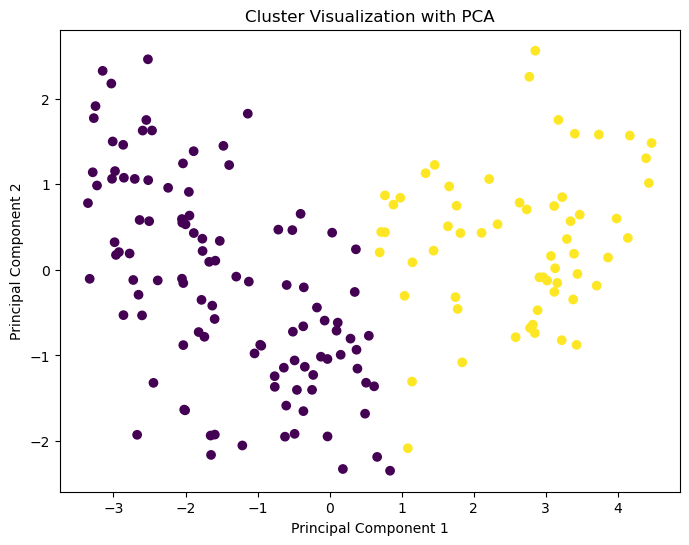

In [18]:
# TODO: Plot clustering results

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels, cmap='viridis')
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [19]:
# TODO: Find the number of principal components using explained variance ratio

pca = PCA()
pca.fit(X_train_scaled)

# Calculating the cumulative sum of explained variances
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1  # Adding 1 because array indices start at 0

print(f"Number of principal components to explain 95% variance: {n_components_95}")

Number of principal components to explain 95% variance: 3


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

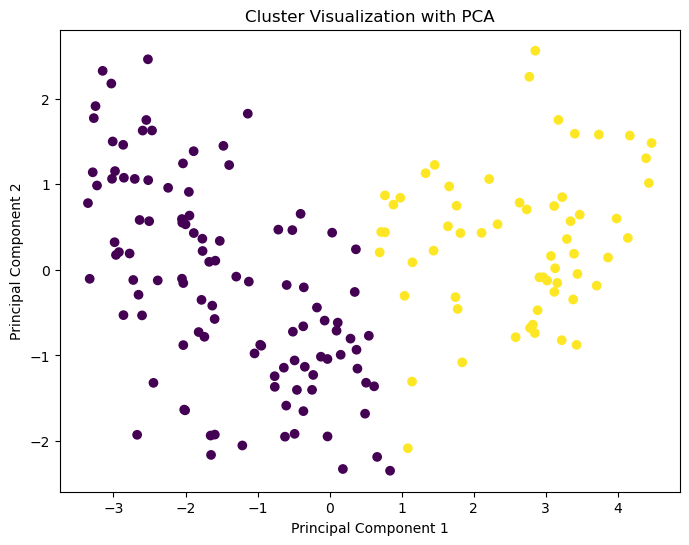

In [20]:
# TODO: Use PCA to transform the data

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels, cmap='viridis')
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [21]:
# TODO: Implement K-means with the transformed data

pca = PCA().fit(X_train_scaled)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(explained_variance_ratio >= 0.95) + 1  # +1 as index starts at 0

In [22]:
# TODO: Calculate the three different validation metrics

pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train_scaled)

kmeans_pca = KMeans(n_clusters=2)
kmeans_pca.fit(X_train_pca)
labels_pca = kmeans_pca.labels_

# Validation metrics
silhouette_pca = silhouette_score(X_train_pca, labels_pca)
calinski_harabasz_pca = calinski_harabasz_score(X_train_pca, labels_pca)
davies_bouldin_pca = davies_bouldin_score(X_train_pca, labels_pca)

/Users/yajurvashisht/opt/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [23]:
# TODO: Display results

results = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],
    'Original Data': [silhouette, calinski_harabasz, davies_bouldin],
    'PCA Transformed Data': [silhouette_pca, calinski_harabasz_pca, davies_bouldin_pca]
})

print(results)

                    Metric  Original Data  PCA Transformed Data
0         Silhouette Score       0.459025              0.466568
1  Calinski-Harabasz Score     196.919550            203.013052
2     Davies-Bouldin Score       0.804642              0.788170


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

#### Answers

1. The orginal dataset had three class labels, therefore the optimal number of clusters was three which makes sense thanks to the three class labels. 
1. Yes, the plots have similar distributions for the three classes.
1. I used two components to explain at least 95% of the variance. Yes, using PCA improved my results. Due to the curse of dimensionality, typically reducing the number of features will improve clustering accuracy results.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

#### Answers

1. My code was sourced from the PCA and Clustering examples that we went over in class along with the previous assignments for ENSF 611. The previous assignments were used to reference how to setting up the same steps that we do every time we do machine learning.

2. The steps were completed in the order they were presented in the assignment itself. Unless the pre-processing is complete the rest of the steps cannot be completed. For parts that I got stuck on I referenced our notes until I was able to work through all of the problems sequentially. Since machine learning is the same five steps always, it is easier to use the same methodology and go from step one to five in order.

3. The use of GenerativeAI was for debugging when I was getting issues with settings up my code. The code was not used, it was more so used for checking that I had inputted everything correctly and I was not missing something causing issues.

4. No, I think there were not any significant challenges in Part B of the assignment. However, since it was the first time we have performed Clustering in conjunction with PCA it was a difficult to know if i was peerforming the steps right. Not having a past assignment like it to reference did not help. However, following the in class examples and trying to take each step one at a time helped me for this assignment. 

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

*ADD YOUR THOUGHTS HERE*

#### Answers

The part of the assignment that I really enjoyed was implementing PCA and Clustering, and getting a chance to try unsupervised learning. It was fascinating seeing how these models interact with data and can be coupled together. Seeing a graphical representation of the scaled data also was interesting because we get to see what the model deemed as the most important. However, I disliked using them together as well because it was hard to know if I was performing the steps properly. It was confusing because some of the in class examples were simpler so I struggled with setting up with the data. 